# 第7回 ツリーモデル2


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 2項ツリーのパラメータの設定について
Black-Scholesモデル（対数正規過程）

$$ \tag{1}
 dS(t) = rS(t)dt + \sigma S(t)dW(t),\ S(0) = S_0
$$

または

$$\tag{2}
S(t) = S_0 \exp\left\{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W(t) \right\}
$$

を近似する2項ツリーのパラメータ $u, d, p$ は

1. $u = e^{\sigma \sqrt{\Delta t}}$
1. $d = e^{-\sigma \sqrt{\Delta t}}$
1. $p=(e^{r\Delta t} - d)/(u - d)$

や

1. $u = \exp\left\{(r - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t}\right\}$
1. $d = \exp\left\{(r - \frac{\sigma^2}{2})\Delta t - \sigma \sqrt{\Delta t}\right\}$
1. $p = 1/2$

であった。これらの導出方法について簡単に説明する。

簡単に言えば対数正規過程(1)と2項ツリーの（条件付き）期待値と（条件付き）分散が一致するように、$u, d, p$を定めればよい。

対数正規過程（1）について、$S(t_i)=s$という条件のもとでの、$S(t_i + \Delta t)$の期待値は

$$
se^{r\Delta t}
$$

であり、分散は

$$
s^2e^{2r \Delta t}(e^{\sigma^2 \Delta t}-1)
$$

となる（対数正規分布の期待値と分散の計算から導かれる）。

一方、2項ツリーモデルにおいて、$S(t_i)=s$という条件のもとでの、$S(t_i + \Delta t)$の期待値は

$$
pus + (1-p)ds
$$

分散は

$$
s^2\left(pu^2 +(1-p)d^2 - e^{2r \Delta t}\right)
$$

となる（下図を参照）。

https://drive.google.com/file/d/13Leez9jv13Dsg62PqXq39v4UJLuf-40a/view?usp=sharing

よって、2つの期待値が等しいとして

$$\tag{3}
se^{r\Delta t} = pus + (1-p)ds
$$

分散が等しいとして

$$\tag{4}
s^2e^{2r \Delta t}(e^{\sigma^2 \Delta t}-1) = s^2\left(pu^2 +(1-p)d^2 - e^{2r \Delta t}\right)
$$

となる。未知数が3つ（$u,d,p$）に対して、式が(3)(4)の2つなので、もう一つ条件式が必要になる。そこで、$u = 1/d$という式を課すと

1. $u = e^{\sigma \sqrt{\Delta t}}$
1. $d = e^{-\sigma \sqrt{\Delta t}}$
1. $p=(e^{r\Delta t} - d)/(u - d)$

が得られる。また、$p=1/2$という式を課すと

1. $u = \exp\left\{(r - \frac{\sigma^2}{2})\Delta t + \sigma \sqrt{\Delta t}\right\}$
1. $d = \exp\left\{(r - \frac{\sigma^2}{2})\Delta t - \sigma \sqrt{\Delta t}\right\}$
1. $p = 1/2$

が得られる。ただし、ここで$\Delta t$がゼロに非常に近い数としたときの近似を行っている。




## ブラウン運動のツリー
対数正規過程の解は

$$
S(t) = S_0 \exp\left\{\left(r - \frac{\sigma^2}{2}\right)t + \sigma W(t) \right\}
$$

であった。この式において不確実性をもつのはブラウン運動$\{W(t)\}$の部分だけであ
る。
よって、ブラウン運動$\{W(t)\}$を近似するツリー$\{W_{i,j}\}$を構成して、そこか
ら$\{S(t)\}$を近似するツリー$\{S_{i,j}\}$を構成することができるだろう。

https://drive.google.com/file/d/1AKyBAbh3AYI5R1upg9xiW1Y7lVgcK6KN/view?usp=sharing



まず時間空間$[0,T]$を$N$等分し、
$\Delta t = T/N$、$t_i=i\Delta t$（$i=0,1,\dots,N$)とおく。

https://drive.google.com/file/d/1AJ1Ts7fcrXWaRswuagZmbLBaSP5Uu5nc/view?usp=sharing


$W_{i,j} = w$のとき、$W_{i+1,j+1} = w + u$,
$W_{i+1, j} = w + d$とし（$d < 0$）、
$W_{i,j}$から$W_{i+1,j+1}$, $W_{i+1,j}$に推移する確率をそれぞれ、$p$, $1-p$とおく。
すなわち、ブラウン運動のツリーでは$p$の確率で$u$だけ上昇し、
$1-p$の確率で$d$だけ上昇する。以上の設定のもとで、
ブラウン運動の振る舞いに整合するように、パラメータ$u, d, p$を決定する。

対数正規過程のときと同じように、ブラウン運動とツリーモデルの条件付き期待値と条件付き分散が等しいとしてパラメータを求めると

$$
u = \sqrt{\Delta t}, d = -\sqrt{\Delta t}, p = 1/2
$$

となる。これをもとにプログラムを書くと以下のようになる。ヨーロピアンコールオプションの価格を求めるプログラムである。


In [2]:
S0 = 100 # 株価、オプションのパラメータ
K = 99
T = 1
r = 0.01
sigma = 0.2

N = 1000 

W = np.zeros((N+1, N+1))  # ブラウン運動の値を格納する変数
S = np.zeros((N+1, N+1))  # 株価を格納する変数
C = np.zeros((N+1, N+1))  # オプション価値を格納する変数

delta = T/N  # 時間間隔

u = np.sqrt(delta) # 上昇の大きさ
d = -np.sqrt(delta) # 下降の大きさ
p = 0.5  

# 株価ツリーの構築  
for i in range(N+1):
  for j in range(i+1):
    W[i, j] = j*u + (i - j)*d  
    S[i, j] = S0 * np.exp((r - 0.5 * sigma**2) * delta * i + sigma * W[i, j])

# 満期におけるオプション価値
for j in range(N+1):
  C[N, j] = np.maximum(S[N, j] - K, 0)

# 後ろ向きにオプション価値を計算
for i in reversed(range(N)):
  for j in range(i+1):
    C[i, j] = np.exp(-r * delta)*(p * C[i+1, j+1] + (1 - p) * C[i+1, j])

print(f'{C[0, 0]:.3f}')

8.917


## 2項ツリーの収束

いま、満期までの時間を$N$分割したとする。
このとき、2項ツリーモデルによって得られたヨーロピアンコールオプションの
価格を$C(N)$とし、Black-Scholes式から得られる解析解を$C_{BS}$とすると

$$
|C(N) - C_{BS}| = O\left(\frac1N\right)
$$

となる。これは、$N$が十分大きいとき、ある定数$k$に対して$|C(N) - C_{BS}| < k \cdot \frac1N$という意味で、$1/N$の次数で収束するとよぶ。

収束の様子を見てみる。2項ツリーによるヨーロピアンコールオプションの価格導出を関数化する。

In [4]:
def BtreeCall(N, S0, K, T, r, sigma):
  S = np.zeros((N+1, N+1)) # 株価を格納する変数
  C = np.zeros((N+1, N+1))  # オプション価値を格納する変数

  delta = T/N  # 時間幅
  u = np.exp(sigma * np.sqrt(delta))  # 2項ツリーのパラメータ
  d = np.exp(-sigma * np.sqrt(delta))
  p = (np.exp(r * delta) - d) / (u - d)

  # 株価ツリーの構築
  for i in range(N+1):   
    for j in range(i+1):
      S[i, j] = S0 * u**j * d**(i - j)

  # 満期におけるオプション価格
  for j in range(N+1):
    C[N, j] = np.maximum(S[N, j] - K, 0)

  # 後ろ向きにオプション価値を計算
  for i in reversed(range(N)):
    for j in range(i+1):
      C[i, j] = np.exp(-r * delta) * (p * C[i+1, j+1] + (1 - p) * C[i+1, j])

  return C[0, 0]

In [5]:
BtreeCall(1000, 100, 99, 1, 0.01, 0.2)

8.919095971857626

$N$を大きくしたときに、2項ツリーによるオプション価格が解析解に近づく様子をグラフにする。

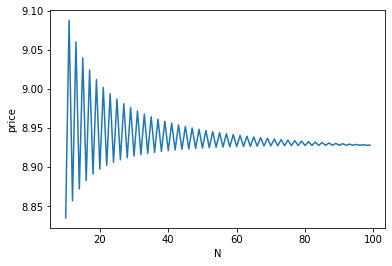

In [6]:
M = 100
price = np.zeros(M - 10)
j = 0

for N in range(10, M):
  price[j] = BtreeCall(N, 100, 99, 1, 0.01, 0.2)
  j += 1

plt.xlabel('N')
plt.ylabel('price')
plt.plot(range(10, M), price)
plt.show()

振動しながら真の値に近づくのは2項ツリーの特徴である。